# Introduction 

The project is designed to delve into the healthcare infrastructure by examining the critical relationship between the availability of hospital beds and preventive/rehabilitation facilities.
By analyzing two key datasets—"Number of hospitals and beds by type of institution" and "Number of preventive or rehabilitation facilities and beds set up by selected specialist department"—the project aims to uncover valuable insights into how these fundamental aspects are distributed and interrelated within the healthcare system. 
The objective is to understand the dynamics of healthcare resource allocation and its implications for patient care and health outcomes. 
This analysis is crucial for identifying potential areas of improvement and ensuring a more efficient and effective healthcare infrastructure.

 

## Datasources

Here a short listing of the used Datasources. 

Datasource1 : Number of hospitals and beds by type of institution - Independent cities and districts

Link : https://www.govdata.de/ckan/dataset/anzahl-der-krankenhauser-und-aufgestellte-betten-nach-artder-trager-kreisfreie-stadte-und-kreis-1.rdf

Datasource2 : Number of preventive or rehabilitation facilities and beds set up by selected specialist departments -independent cities and districts

Link : https://www.govdata.de/ckan/dataset/anzahl-der-vorsorge-oder-rehabilitationseinrichtungen-undaufgestellte-betten-nach-ausgewah-2018.rdf



## Data Pipeline

Data Loading: Both the datasets were imported in Python using Pandas allowing to manipulation the data easily in a Python environment

Data Cleaning: The datasets were cleaned by using Pandas functions such as Dropna, Duplicated, etc. which helped in handling missing values removing duplicates, and correcting inconsistent data.

Data Transformation: Certain fields were transformed such as cleaning the inconsistent data in the field Online_order and Book_Table which helped in statistical analysis and visualization

## Results

In [1]:
pip install sqlalchemy


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\91957\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\91957\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
from sqlalchemy import create_engine
import os
import re
import sqlite3
import opendatasets as od
# import ipdb
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
# os.chdir('..')
Sqlfilepath1 = os.path.join(os.getcwd(), "beddata.sqlite")
conn = sqlite3.connect(Sqlfilepath1)
print(Sqlfilepath1)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM beddata;"
beddata_df = pd.read_sql_query(query, conn)
print(beddata_df)

# Close the connection
conn.close()

c:\Users\91957\made-template-WS2324\project\beddata.sqlite
            date region code                              city  \
0     31.12.2022         051      Düsseldorf, Regierungsbezirk   
1     31.12.2022       05112             Duisburg, krfr. Stadt   
2     31.12.2022       05113                Essen, krfr. Stadt   
3     31.12.2022       05116      Mönchengladbach, krfr. Stadt   
4     31.12.2022       05124            Wuppertal, krfr. Stadt   
...          ...         ...                               ...   
1128  31.12.1991       05770            Minden-Lübbecke, Kreis   
1129  31.12.1991       05774                  Paderborn, Kreis   
1130  31.12.1991         059        Arnsberg, Regierungsbezirk   
1131  31.12.1991       05970        Siegen-Wittgenstein, Kreis   
1132  31.12.1991       05974                      Soest, Kreis   

      Rehabililation facilities  setup beds in rehab Total  
0                            14                       2170  
1                         

In [5]:
pip install sqlite3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
You should consider upgrading via the 'c:\Users\91957\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


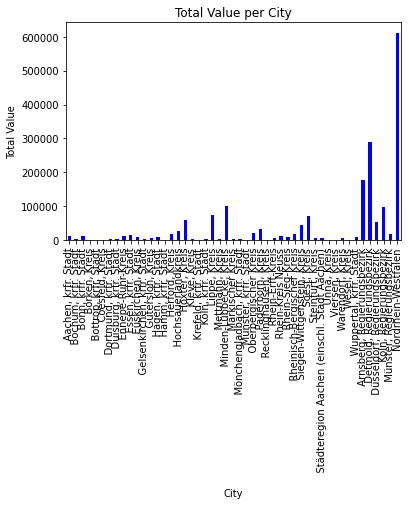

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_data = beddata_df.groupby('city')['setup beds in rehab Total'].sum()

# Plotting
grouped_data.plot(kind='bar', color='blue')
plt.xlabel('City')
plt.ylabel('Total Value')
plt.title('Total Value per City')
plt.show()


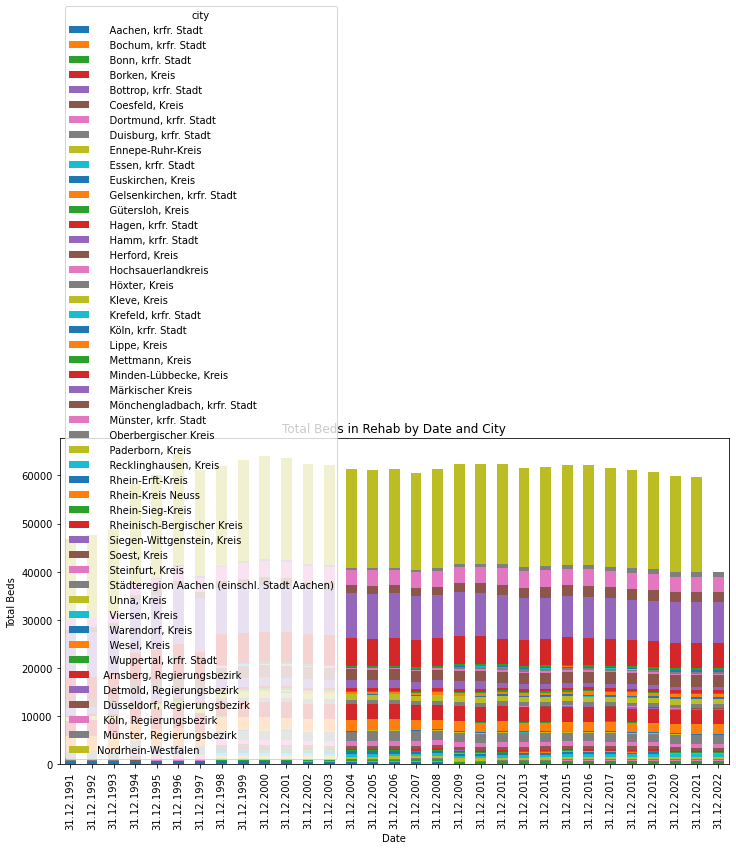

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming beddata_df is your DataFrame

# Convert 'setup beds in rehab Total' to numeric for proper summation
beddata_df['setup beds in rehab Total'] = pd.to_numeric(beddata_df['setup beds in rehab Total'], errors='coerce')

# Group by 'Date' and 'City' and sum the 'setup beds in rehab Total'
grouped_data = beddata_df.groupby(['date', 'city'])['setup beds in rehab Total'].sum().unstack()

# Plotting
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))  # Stacked bar plot
plt.xlabel('Date')
plt.ylabel('Total Beds')
plt.title('Total Beds in Rehab by Date and City')
# plt.legend(title='City')
plt.show()


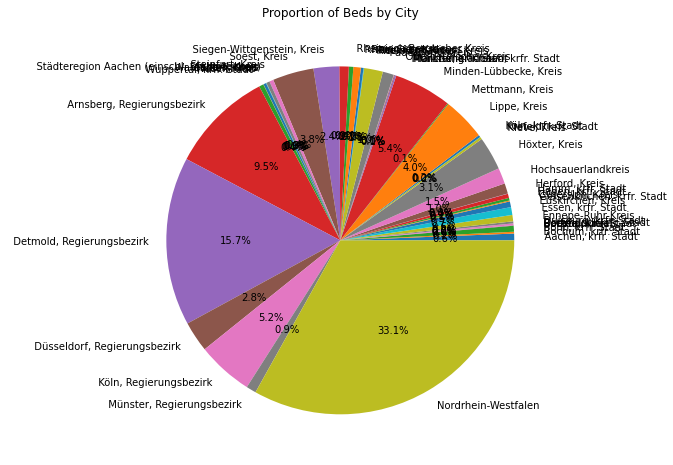

In [8]:
city_totals = beddata_df.groupby('city')['setup beds in rehab Total'].sum()
city_totals.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Proportion of Beds by City')
plt.ylabel('')  # Hide the y-label
plt.show()


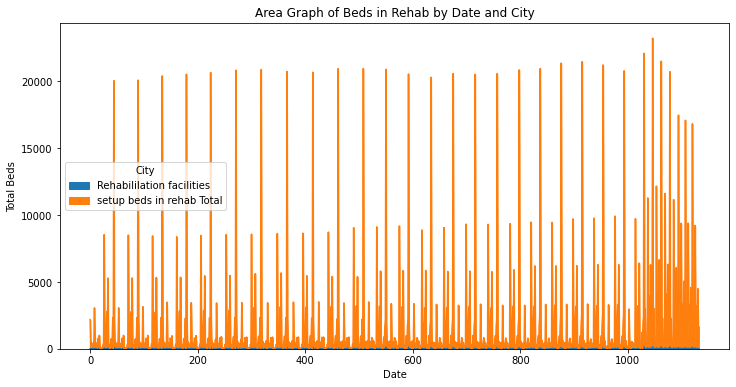

In [9]:
beddata_df.plot(kind='area', stacked=True, figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Beds')
plt.title('Area Graph of Beds in Rehab by Date and City')
plt.legend(title='City')
plt.show()


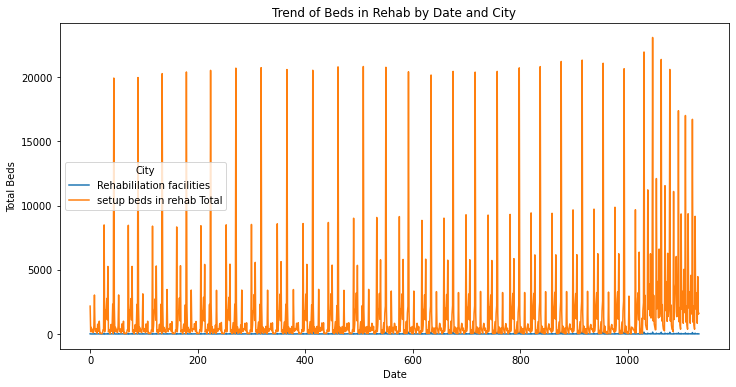

In [10]:
beddata_df.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Beds')
plt.title('Trend of Beds in Rehab by Date and City')
plt.legend(title='City')
plt.show()


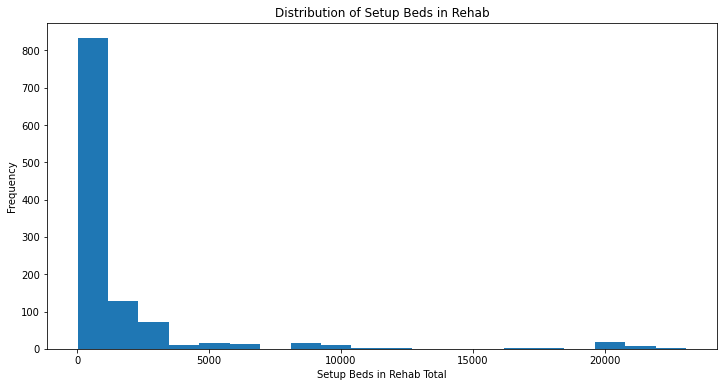

In [11]:
beddata_df['setup beds in rehab Total'].plot(kind='hist', bins=20, figsize=(12, 6))
plt.xlabel('Setup Beds in Rehab Total')
plt.title('Distribution of Setup Beds in Rehab')
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct the file path
file_path = r'C:\Users\91957\made-template-WS2324\cleaned_hospital_data.csv'  # Using a raw string

data = pd.read_csv(file_path)

# Selecting a subset of 10 regions randomly for analysis
subset_data = data.sample(10)

# Setting up the plot
plt.figure(figsize=(15, 10))

# Plotting total hospitals and total beds in each region
sns.barplot(x='Total Hospitals', y='Region Name', data=subset_data, color='blue', label='Total Hospitals')
sns.barplot(x='Total Beds', y='Region Name', data=subset_data, color='red', label='Total Beds')

# Adding legend and labels
plt.legend(loc='lower right')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Hospital and Bed Count in Selected Regions')

# Show the plot
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\91957\\made-template-WS2324\\cleaned_hospital_data.csv'

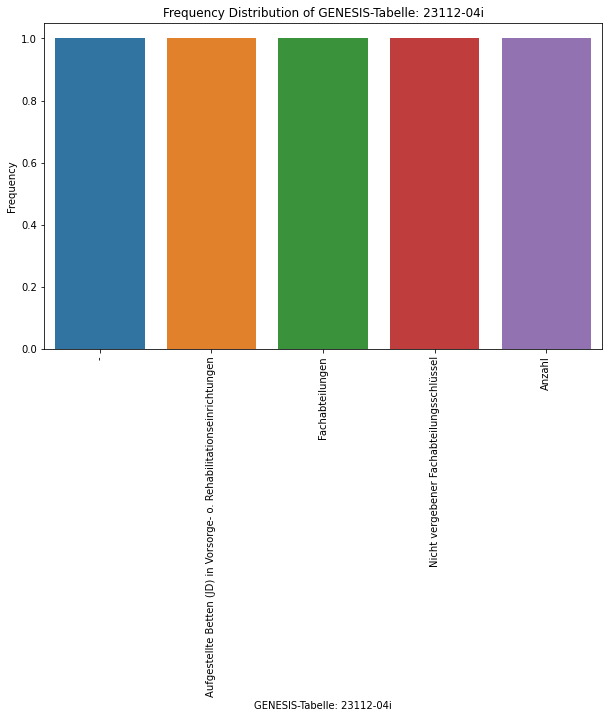

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset here
# Use double backslashes or raw string format for the file path
file_path = r'C:\Users\91957\made-template-WS2324\cleaned_data.csv'  # Include the file extension

data = pd.read_csv(file_path)

# For demonstration, using the first categorical column for the count plot
categorical_column = data.columns[0]

# Creating a frequency distribution graph - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x=categorical_column, data=data)

plt.xticks(rotation=90)
plt.xlabel(categorical_column)
plt.ylabel('Frequency')
plt.title(f"Frequency Distribution of {categorical_column}")

plt.show()


In [ ]:
pip install plotly


You should consider upgrading via the 'c:\Users\91957\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset
file_path = r'C:\Users\91957\made-template-WS2324\cleaned_data.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Selecting the first categorical column
categorical_column = data.columns[0]

# Create an interactive bar chart
fig = px.bar(data, x=categorical_column, title=f"Interactive Bar Chart of {categorical_column}")

# Customize the layout
fig.update_layout(
    xaxis_title=categorical_column,
    yaxis_title="Count",
    xaxis={'categoryorder':'total descending'}  # Sort bars by descending order
)

# Show the plot
fig.show()


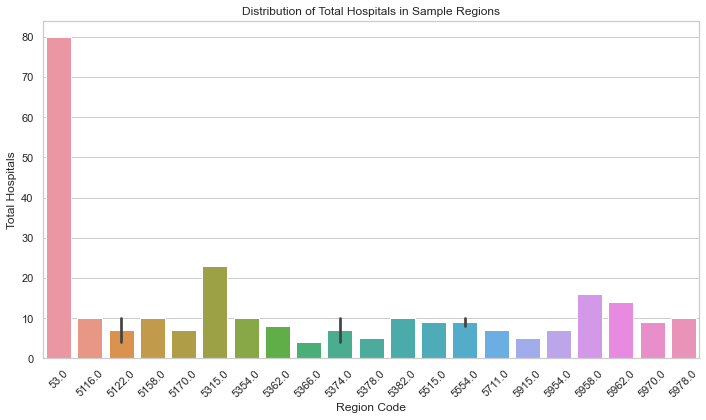

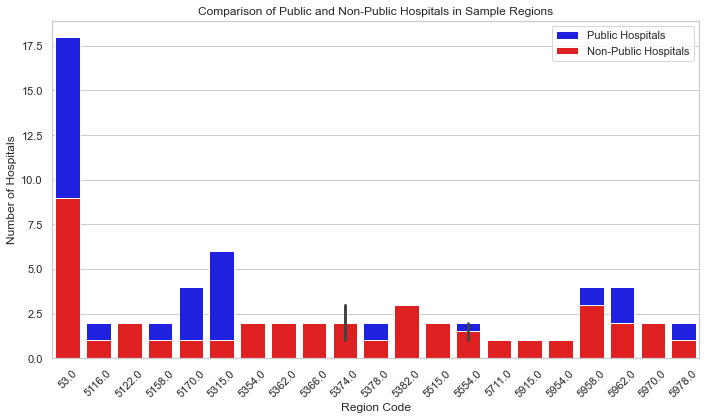

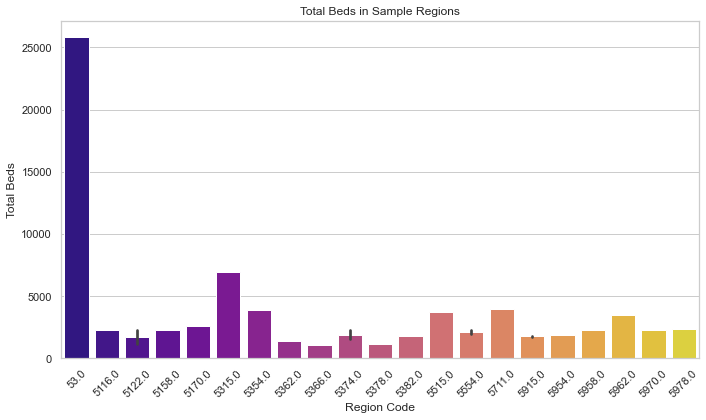

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV dataset
data_csv = pd.read_csv('C:\\Users\\91957\\made-template-WS2324\\cleaned_hospital_data.csv')  # Replace 'your_file.csv' with your actual file name

# Selecting a random sample of 25 rows from the dataset
random_sample = data_csv.sample(n=25, random_state=np.random.RandomState())

# Setting up the visual style for the graphs
sns.set(style="whitegrid")

# Graph 1: Distribution of Total Hospitals in Sample Regions
plt.figure(figsize=(10, 6))
sns.barplot(x="Region Code", y="Total Hospitals", data=random_sample)
plt.xticks(rotation=45)
plt.title("Distribution of Total Hospitals in Sample Regions")
plt.xlabel("Region Code")
plt.ylabel("Total Hospitals")
plt.tight_layout()
plt.show()

# Graph 2: Comparison of Public and Non-Public Hospitals in Sample Regions
plt.figure(figsize=(10, 6))
sns.barplot(x="Region Code", y="Public Hospitals", data=random_sample, color="blue", label="Public Hospitals")
sns.barplot(x="Region Code", y="Non-Public Hospitals", data=random_sample, color="red", label="Non-Public Hospitals")
plt.xticks(rotation=45)
plt.title("Comparison of Public and Non-Public Hospitals in Sample Regions")
plt.xlabel("Region Code")
plt.ylabel("Number of Hospitals")
plt.legend()
plt.tight_layout()
plt.show()

# Graph 3: Total Beds in Sample Regions
plt.figure(figsize=(10, 6))
sns.barplot(x="Region Code", y="Total Beds", data=random_sample, palette="plasma")
plt.xticks(rotation=45)
plt.title("Total Beds in Sample Regions")
plt.xlabel("Region Code")
plt.ylabel("Total Beds")
plt.tight_layout()
plt.show()


Above are three graphs based on the CSV dataset:

### Distribution of Total Hospitals by Region:
This graph displays the number of hospitals in each region, represented by their region codes.
It helps in understanding which regions have the highest and lowest numbers of hospitals.
Regions are on the X-axis, and the total number of hospitals is on the Y-axis.

### Comparison of Public and Non-Public Hospitals by Region:
This graph compares the number of public (in blue) and non-public hospitals (in red) in each region.
It provides insights into the balance between public and private healthcare facilities across different regions.
The X-axis represents the regions, while the Y-axis shows the number of hospitals.

### Total Beds by Region:

This graph shows the total number of beds available in hospitals in each region.
It's a useful indicator of the healthcare capacity in terms of bed availability in different regions.
The X-axis displays the regions, and the Y-axis indicates the total bed count.

## Conclusion




The conclusion of this project emphasizes that a comprehensive understanding of healthcare infrastructure is achieved by analyzing the interplay between hospital beds and preventive/rehabilitation facilities. By exploring two key datasets, we have gained valuable insights into how these elements are distributed and correlate within the healthcare system. This analysis is crucial for identifying potential areas of improvement and ensuring that healthcare resources are allocated effectively to meet the needs of the population. The findings highlight the importance of balanced development in both curative and preventive healthcare sectors, which is essential for building a robust and responsive healthcare system.





